In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [20]:
#Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
 9   Month        397924 non-null  int32         
 10  Year         397924 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 33.4+ MB


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Data Cleaning : Remove rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

In [21]:
# Checking for remaining null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Month          0
Year           0
dtype: int64

In [8]:
# Remove canceled orders (InvoiceNo starting with 'C')

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [9]:
# Convert InvoiceDate to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
# New column for TotalPrice

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [18]:
# Feature Engineering : Extract month and year from Invoice Date

df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

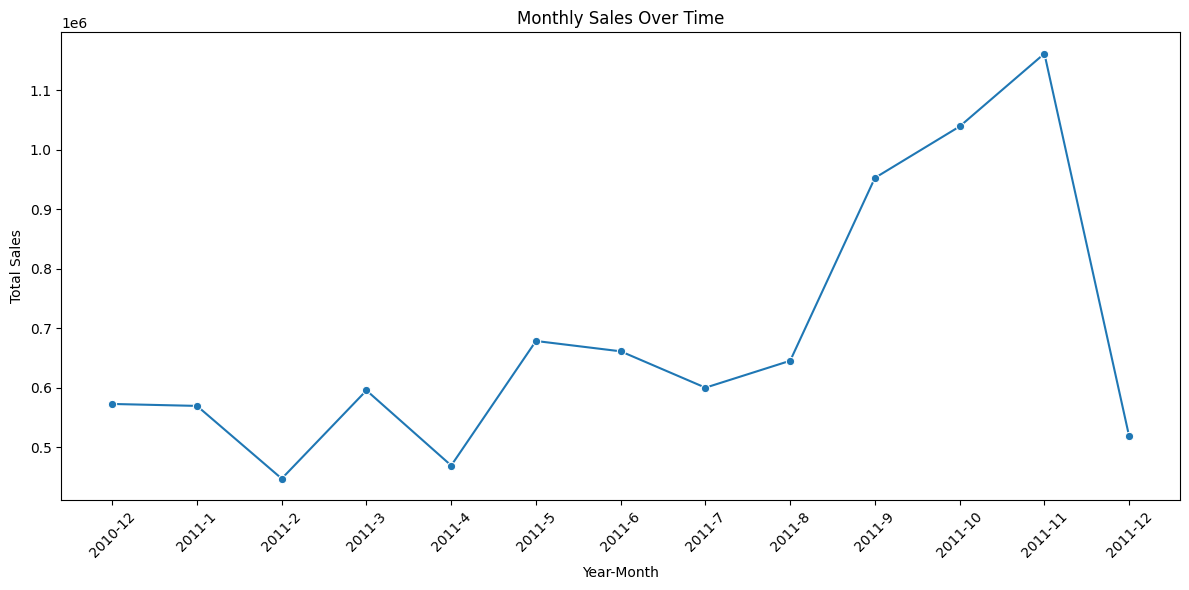

In [14]:
# Sales Analysis
# Monthly Sales

monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='TotalPrice', marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\KRISHNA TYAGI\AppData\Local\Temp\ipykernel_21868\819008215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


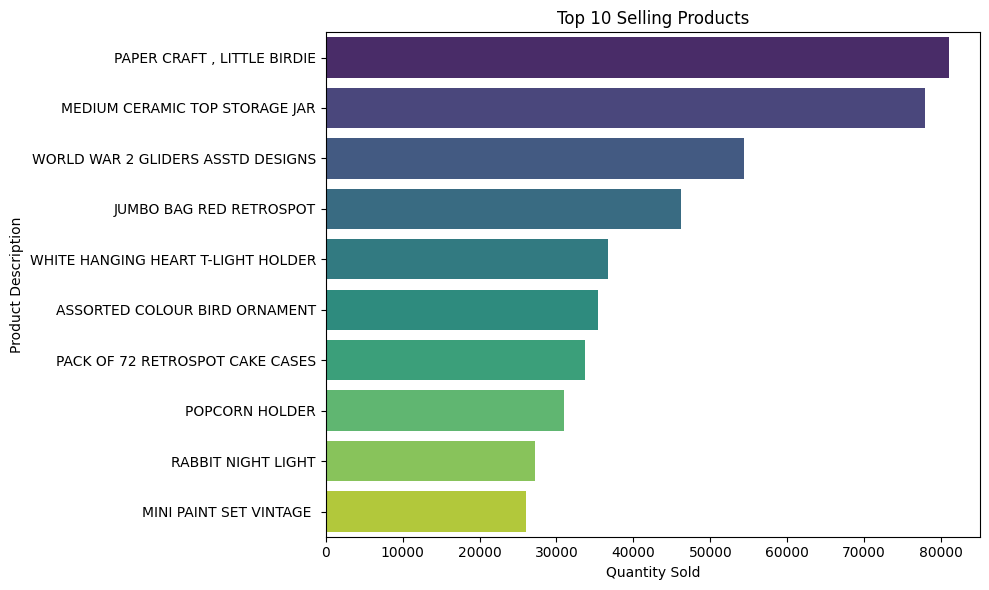

In [15]:
# Top 10 Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

C:\Users\KRISHNA TYAGI\AppData\Local\Temp\ipykernel_21868\2179000833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='magma')


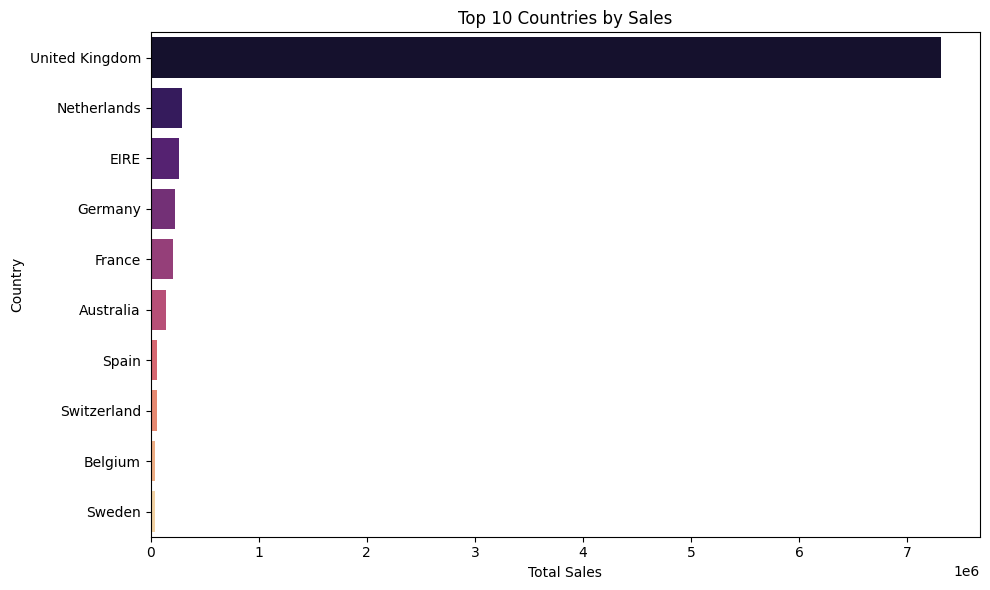

In [16]:
# Sales by Country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='magma')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [17]:
# Revenue Statistics
revenue = df['TotalPrice'].values
print(f"Total Revenue: {np.sum(revenue):.2f}")
print(f"Average Revenue per Transaction: {np.mean(revenue):.2f}")
print(f"Maximum Revenue in a Transaction: {np.max(revenue):.2f}")
print(f"Minimum Revenue in a Transaction: {np.min(revenue):.2f}")
print(f"Standard Deviation of Revenue: {np.std(revenue):.2f}")

Total Revenue: 8911407.90
Average Revenue per Transaction: 22.39
Maximum Revenue in a Transaction: 168469.60
Minimum Revenue in a Transaction: 0.00
Standard Deviation of Revenue: 309.06
